<a href="https://colab.research.google.com/github/IkAnanaba/LicensePlateRecognition/blob/OCR/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install torch torchvision torchaudio

In [3]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 13.4 MB/s eta 0:00:00


In [4]:
from IPython.core.interactiveshell import no_op
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

Reading our image

In [5]:
from google.colab.patches import cv2_imshow

In [6]:
ocr_reader= easyocr.Reader(lang_list=['en'])


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [7]:

font= cv2.FONT_HERSHEY_PLAIN

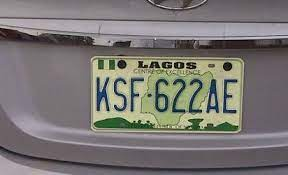

In [8]:
car= cv2.imread('/content/download (5).jpeg')
cv2_imshow(car)

In [9]:
number= ocr_reader.readtext(car, detail=1, paragraph = False)
detected_text= number[0][1]
plate_number=detected_text.strip()
plate_number

'KSF 6zzAE'

In [10]:
# dictionaries
dict_char_to_int = {'O': '0',
                        'I': '1',
                         'Z':'2',
                        'J': '3',
                        'A': '4',
                        'G': '6',
                        'S': '5'}
dict_int_to_char = {'0': 'O',
                        '1': 'I',
                        '3': 'J',
                        '4': 'A',
                        '6': 'G',
                        '5': 'S'}
# Remove spaces from the plate number
plate_number = plate_number.replace(' ', '')
plate_number
if len(plate_number) != 8:
  print ('no')
# Separate the plate number into parts
part1 = plate_number[:3]
part2 = plate_number[3:6]
part3 = plate_number[6:]
correct_part1=[]
for a in part1:
  if a.isalpha():
    if a.isupper():
      correct_part1 += a
  else:
    if a in dict_int_to_char:
      a=dict_int_to_char[a]
      correct_part1 +=a
print(correct_part1)
correct_part2=[]
for b in part2:
  if b.isdigit():
    correct_part2 +=b
  else:
    b= b.upper()
    if b in dict_char_to_int:
      b=dict_char_to_int[b]
      correct_part2 +=b
print(correct_part2)
correct_part3=[]
for c in part3:
  if c.isalpha():
    if c.isupper():
      correct_part3 += c
  else:
    if c in dict_int_to_char:
      c=dict_int_to_char[c]
      correct_part3 +=c
print(correct_part3)
parts= correct_part1 + correct_part2 + correct_part3
result = ' '.join(parts)
print('Licence plate number = ',result)




['K', 'S', 'F']
['6', '2', '2']
['A', 'E']
Licence plate number =  K S F 6 2 2 A E


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
